In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import seaborn as sns

import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
transits = pd.read_hdf('observed-long-period-transits.h5', key='transits')
transits.head()

,kepid_x,tce,tce_max_mult_ev,tce_period,tce_plnt_num,transit_time_x,quarter,season,channel,idx,kepid_y,module,output,skygroup,transit_time_y
0,2304168,002304168-02,12.22,431.719,2,219.298,2,0,4,0,2304168,2,4,84,219.298
1,2304168,002304168-02,12.22,431.719,2,651.017,7,1,56,1,2304168,16,4,84,651.017
2,2304168,002304168-02,12.22,431.719,2,1082.736,11,1,56,2,2304168,16,4,84,1082.736
3,2304168,002304168-02,12.22,431.719,2,1514.455,16,2,84,3,2304168,24,4,84,1514.455
4,2303102,002303102-10,11.51,480.481,10,161.570,1,3,32,4,2303102,10,4,84,161.570


0it [00:00, ?it/s]

NameError: name 'KEPLER_BEGIN_BK' is not defined

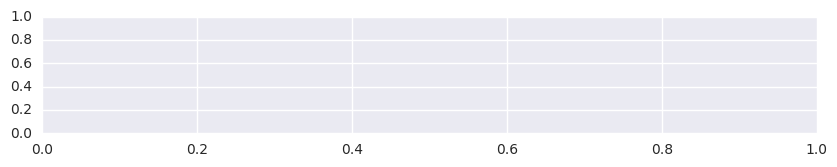

In [7]:
stepsize = 50
boundaries = range(50, 750, stepsize)
pl.figure(figsize=(10, 25))
for idx, bound in tqdm(enumerate(boundaries)):
    mask = (transits.tce_period >= bound) & (transits.tce_period < bound + stepsize)
    pl.subplot(len(boundaries), 1, idx+1)
    _ = pl.hist(transits.transit_time_x[mask],
                range=(KEPLER_BEGIN_BK, KEPLER_END_BK),
                bins=(KEPLER_END_BK - KEPLER_BEGIN_BK))  # 1 bin per day
    pl.xlim([KEPLER_BEGIN_BK, KEPLER_END_BK])
    pl.ylim([0, 110])
    pl.yticks(range(0, 101, 25))
    pl.text(190, 90, 'tce_period = [{}, {}['.format(bound, bound+stepsize))
    pl.ylabel('Transits per day')
pl.xlabel('Time BK')